# Postprocessing Notebook for IDSM2

In [2]:
#interactive widget requires pip install ipympl  
%matplotlib widget
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [3]:
df = pd.read_csv("./simulations/tb_ideal_idsm2_scaled.txt", sep=r'\s+')

In [4]:
df

,time,vo1,vo2,q,p1,p2
0,0.000000e+00,0.599401,0.599401,6.509707e-08,0.0,1.200000
1,1.000000e-12,0.599401,0.599401,-1.662153e-05,0.0,1.188000
2,2.000000e-12,0.599401,0.599401,-2.507784e-05,0.0,1.176000
3,4.000000e-12,0.599401,0.599401,-2.626604e-05,0.0,1.152000
4,6.983705e-12,0.599401,0.599401,-1.074548e-05,0.0,1.116196
...,...,...,...,...,...,...
79358,6.499676e-05,0.631681,0.544408,6.509685e-08,0.0,1.200000
79359,6.499776e-05,0.631681,0.544408,6.509685e-08,0.0,1.200000
79360,6.499876e-05,0.631681,0.544408,6.509685e-08,0.0,1.200000
79361,6.499976e-05,0.631680,0.544408,6.509685e-08,0.0,1.200000


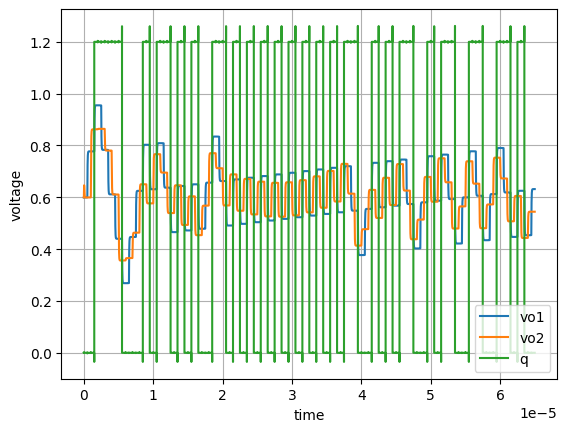

In [5]:
plt.figure(1)
plt.clf()
plt.plot(df['time'], df['vo1'], label="vo1")
plt.plot(df['time'], df['vo2'], label="vo2")
plt.plot(df['time'], df['q'], label="q")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [6]:
vmid = 0.6
vin = vmid+7e-3
vfs = 0.5
per = 1e-6
tstart = 1.5e-6
N = 64
dout = df['q']
t = df['time']
ts = np.arange(tstart, tstart+N*per, per)
interp_func = interp1d(t, dout)
dsamp = interp_func(ts)
dsamp[dsamp > 0.6] = 1
dsamp[dsamp < 0.6] = 0
csum = np.cumsum(dsamp)
out = vmid-vfs/2 + np.cumsum(csum)*2.0/N/(N+1)*vfs

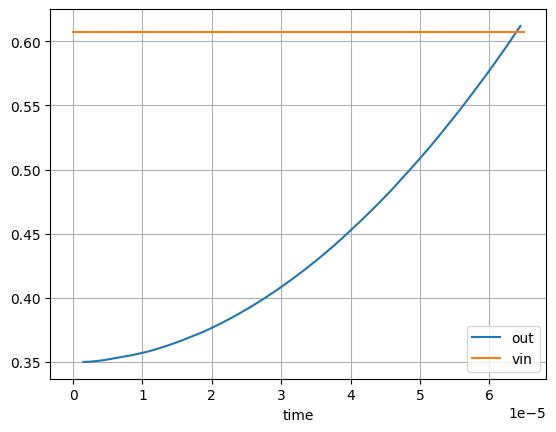

In [7]:
plt.figure(2)
plt.clf()
plt.plot(ts, out, label="out")
plt.plot([0, 65e-6], [vin, vin], label="vin")
plt.xlabel("time")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [8]:
out[-2]

0.6040865384615384

In [9]:
out[-1]

0.6120192307692307

In [10]:
vin

0.607